Autoregressive Model to predict Adj close price:

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np
from pandas import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time



C:\Users\Alonso\AppData\Local\Temp/ipykernel_9848/4269141519.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [24]:
SP = yf.download(tickers='^GSPC', period='max', interval='1d')
SP = SP[['Open', 'Adj Close', 'High', 'Low', 'Volume']]
SP.rename(columns= {'Adj Close': 'Adj_Close'}, inplace=True)
SP = SP.reset_index()
pd.DataFrame.tail(SP)

newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
SP=SP[newcols]

SP=SP.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
SP= SP.reset_index()

MSFT = yf.download(tickers='MSFT', period='max', interval='1d')
MSFT = MSFT[['Open', 'Adj Close', 'High', 'Low', 'Volume']]
MSFT.rename(columns= {'Adj Close': 'Adj_Close'}, inplace=True)
MSFT = MSFT.reset_index()
pd.DataFrame.tail(MSFT)
newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
MSFT=MSFT[newcols]
MSFT=MSFT.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
MSFT= MSFT.reset_index()

Amazon= yf.download(tickers='AMZN', period='max', interval='1d')
Amazon = Amazon[['Open', 'Adj Close', 'High', 'Low', 'Volume']]
Amazon = Amazon.reset_index()
Amazon.rename(columns= {'Adj Close': 'Adj_Close'}, inplace=True)
Amazon['Date']=pd.to_datetime(Amazon.Date)


newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
Amazon=Amazon[newcols]

Amazon=Amazon.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
Amazon= Amazon.reset_index()
pd.DataFrame.tail(Amazon)

Apple= yf.download(tickers='AAPL', period='max', interval='1d')
Apple = Apple[['Open', 'Adj Close', 'High', 'Low', 'Volume']]
Apple= Apple.reset_index()

Apple['Date']= pd.to_datetime(Apple.Date)
Apple.rename(columns= {'Adj Close': 'Adj_Close'}, inplace= True)

newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
Apple=Apple[newcols]

Apple=Apple.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
Apple= Apple.reset_index()
pd.DataFrame.tail(Apple)

Facebook= yf.download(tickers='FB', period='max', interval='1d')
Facebook.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
Facebook= Facebook.reset_index()

Facebook['Date']=pd.to_datetime(Facebook.Date)
pd.DataFrame.head(Facebook)

newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
Facebook=Facebook[newcols]
Facebook=Facebook.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
Facebook= Facebook.reset_index()
pd.DataFrame.tail(Facebook)

Google = yf.download(tickers='GOOGL', period='max', interval='1d')
Google = Google[['Open', 'Adj Close', 'High', 'Low', 'Volume']]
Google = Google.reset_index()

Google.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
Google['Date']=pd.to_datetime(Google.Date)

newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
Google=Google[newcols]
Google=Google.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
Google= Google.reset_index()

Netflix = yf.download(tickers='NFLX', period='max', interval='1d')
Netflix = Netflix[['Open', 'Adj Close', 'High', 'Low', 'Volume']]
Netflix = Netflix.reset_index()


Netflix.rename(columns={'Adj Close': 'Adj_Close'}, inplace=True)
Netflix['Date']=pd.to_datetime(Netflix.Date)
pd.DataFrame.head(Netflix)

newcols= ['Date', 'Open', 'Adj_Close', 'High', 'Low', 'Volume']
Netflix=Netflix[newcols]
Netflix=Netflix.groupby(pd.Grouper(key='Date', axis=0,freq='M')).mean()
Netflix= Netflix.reset_index()
pd.DataFrame.head(Netflix)

[*********************100%***********************]  1 of 1 completed


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[*********************100%***********************]  1 of 1 completed


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Date,Open,Adj_Close,High,Low,Volume
0,2002-05-31,1.155833,1.135834,1.175119,1.121429,2.464677e+07
1,2002-06-30,1.050214,1.038071,1.084322,1.011929,3.709510e+06
2,2002-07-31,1.119578,1.110000,1.154675,1.066429,3.345936e+06
3,2002-08-31,0.874805,0.870974,0.902175,0.832890,2.949227e+06
4,2002-09-30,0.843179,0.828071,0.858679,0.812786,2.787470e+06


In [25]:
TS=pd.to_datetime('2012-05-18')
Amazon = Amazon.loc[Amazon.Date >=TS,:]
Apple = Apple.loc[Apple.Date >= TS, :]
Facebook= Facebook.loc[Facebook.Date >= TS, :]
Google= Google.loc[Google.Date >=TS, :]
Netflix= Netflix.loc[Netflix.Date >=TS, :]
MSFT= MSFT.loc[MSFT.Date >= TS, :]
SP= SP.loc[SP.Date >= TS, :]

In [26]:
SP=SP.loc[:,['Date', 'High']]
Amazon=Amazon.loc[:,['Date', 'High']]
Apple=Apple.loc[:,['Date', 'High']]
Facebook=Facebook.loc[:,['Date', 'High']]
Google=Google.loc[:,['Date', 'High']]
Netflix=Netflix.loc[:,['Date', 'High']]
MSFT= MSFT.loc[:, ['Date', 'High']]

SP:

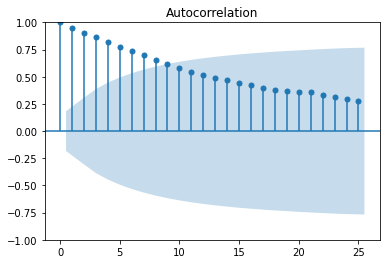

In [27]:
acf_plot= plot_acf( SP.High, lags = 25)

Decaying ACF -> Auto regressive process

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


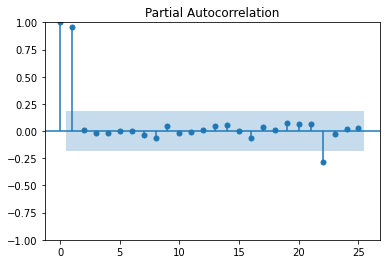

In [28]:
pacf_plot= plot_pacf( SP.High , lags = 25)

Auto regressive model with lags 1

In [29]:
SP=SP.set_index('Date')
train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= SP[:train_end]
testd= SP[train_end+ timedelta(days=30):test_end]

In [30]:
model = ARIMA( traind, order=(2,0,8) )

#q=8 from autocorrelation
#p=2 from partial autocorrelation
#d=0
#order(p,d,q)

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [31]:
model_fit= model.fit()
model_fit.summary()

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   High   No. Observations:                   90
Model:                 ARIMA(2, 0, 8)   Log Likelihood                -479.326
Date:                Sun, 14 Nov 2021   AIC                            982.652
Time:                        18:21:20   BIC                           1012.650
Sample:                    05-31-2012   HQIC                           994.749
                         - 10-31-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2173.9342   2.31e+04      0.094      0.925    -4.3e+04    4.74e+04
ar.L1          0.2427      0.122      1.990      0.047       0.004       0.482
ar.L2          0.7566      0.122      6.214      0.000       0.518       0.995
ma.L1          1.0442      0.250      4.171      0.000       0.554       1.535
ma.L2          0.1051      0.143      0.733      0.463      -0.176       0.386
ma.L3         -0.2670      0.169     -1.582      0.114      -0.598       0.064
ma.L4         -0.1674      0.168     -0.996      0.319      -0.497       0.162
ma.L5          0.3087      0.159      1.936      0.053      -0.004       0.621
ma.L6          0.2415      0.195      1.241      0.215      -0.140       0.623
ma.L7          0.2579      0.167      1.546      0.122      -0.069       0.585
ma.L8          0.4454      0.154      2.888      0.004       0.143       0.748
sigma2      2093.2389    489.040      4.280      0.000    1134.739    3051.739
===================================================================================
Ljung-Box (L1) (Q):                   0.48   Jarque-Bera (JB):                 7.72
Prob(Q):                              0.49   Prob(JB):                         0.02
Heteroskedasticity (H):               3.79   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.49e+14. Standard errors may be unstable.
"""

In [32]:
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]

In [33]:
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions

C:\Users\Alonso\AppData\Local\Temp/ipykernel_9848/2399238653.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.axhline(0, LineStyle="--", alpha = 0.5)


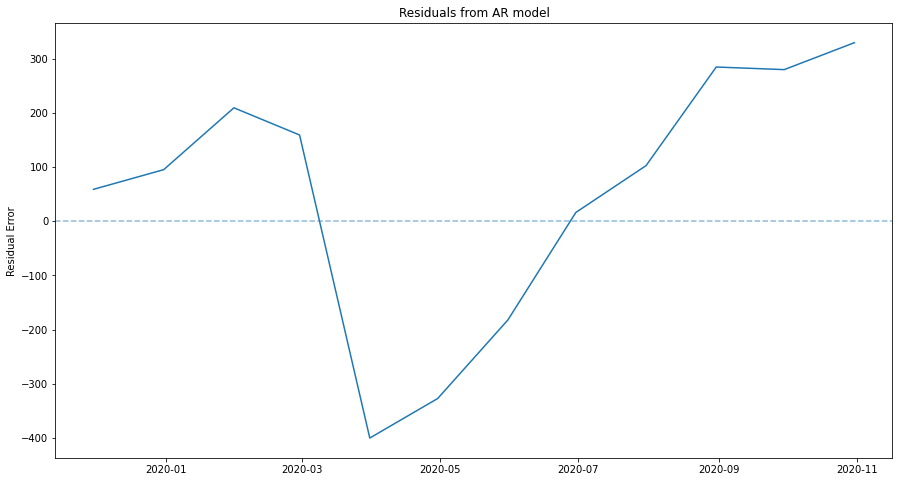

In [34]:
plt.figure( figsize= (15,8))
plt.plot(residuals)
plt.title("Residuals from AR model")
plt.ylabel("Residual Error")
plt.axhline(0, LineStyle="--", alpha = 0.5)



Text(0, 0.5, 'High value')

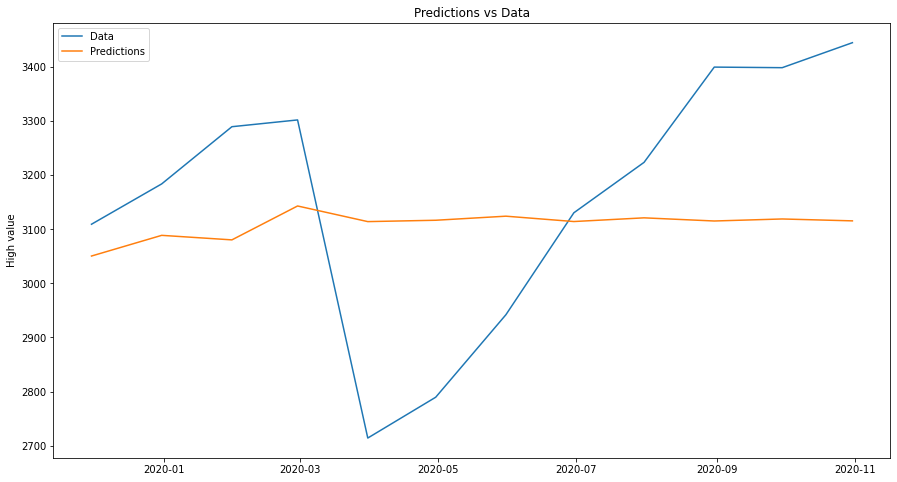

In [35]:
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')

In [36]:
print('MAE is: ',np.mean(abs(residuals/testd)))

MAE is:  High    0.06548
dtype: float64


In [37]:
Apple=Apple.set_index('Date')
Amazon=Amazon.set_index('Date')
Facebook=Facebook.set_index('Date')
Google=Google.set_index('Date')
Netflix=Netflix.set_index('Date')
MSFT=MSFT.set_index('Date')

Amazon:

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was

MAE is:  High    0.192748
dtype: float64


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


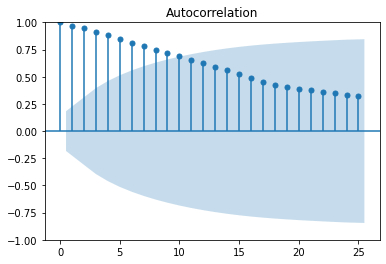

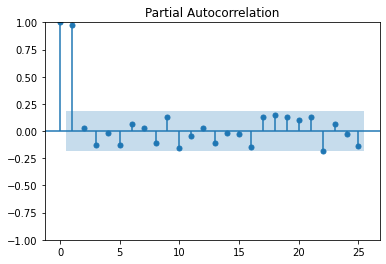

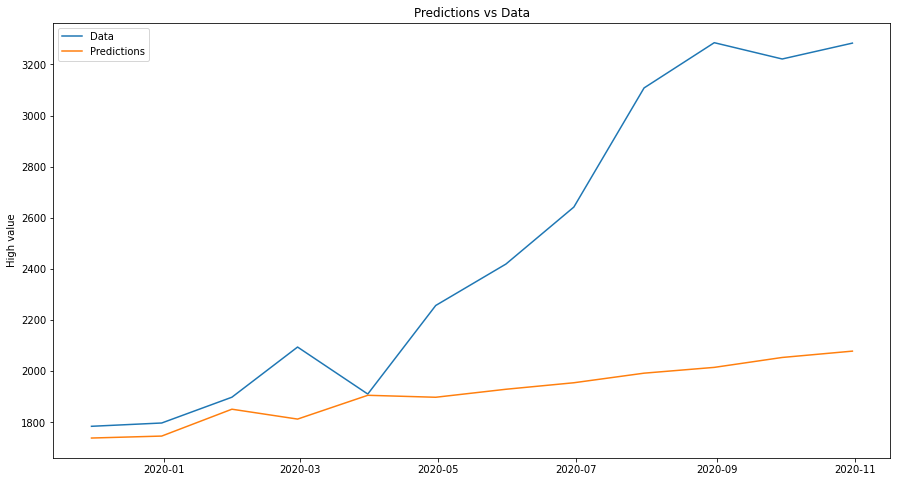

In [38]:
acf_plot= plot_acf( Amazon.High, lags = 25)
pacf_plot= plot_pacf( Amazon.High , lags = 25)

train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= Amazon[:train_end]
testd= Amazon[train_end+ timedelta(days=30):test_end]
model = ARIMA( traind, order=(2,3,10) )

#q=10 from autocorrelation
#p=2 from partial autocorrelation
#d
#order(p,d,q)
model_fit= model.fit()
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')
print('MAE is: ',np.mean(abs(residuals/testd)))

Apple:

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was

MAE is:  High    0.088236
dtype: float64


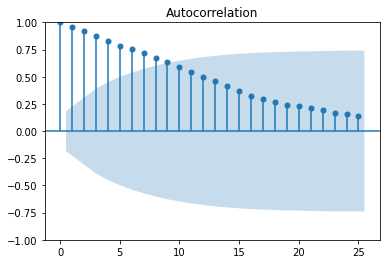

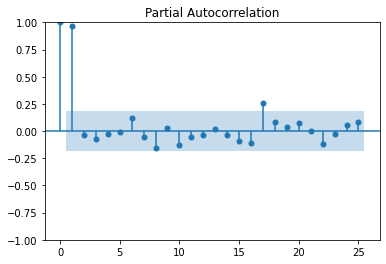

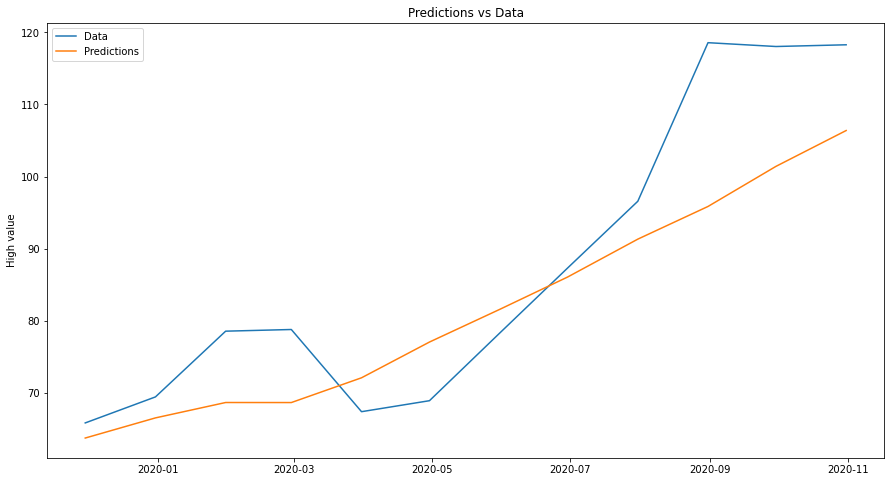

In [39]:
acf_plot= plot_acf( Apple.High, lags = 25)
pacf_plot= plot_pacf( Apple.High , lags = 25)

train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= Apple[:train_end]
testd= Apple[train_end+ timedelta(days=30):test_end]

model = ARIMA( traind, order=(2,4,9) )

#q=9 from autocorrelation
#p=2 from partial autocorrelation
#d=4
#order(p,d,q)
model_fit= model.fit()
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')
print('MAE is: ',np.mean(abs(residuals/testd)))

Facebook:

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was

MAE is:  High    0.133605
dtype: float64


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


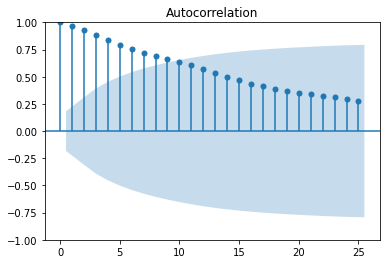

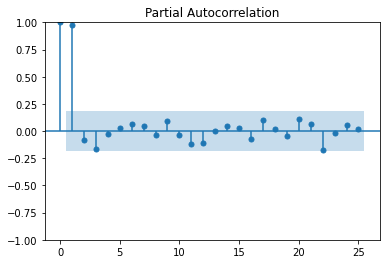

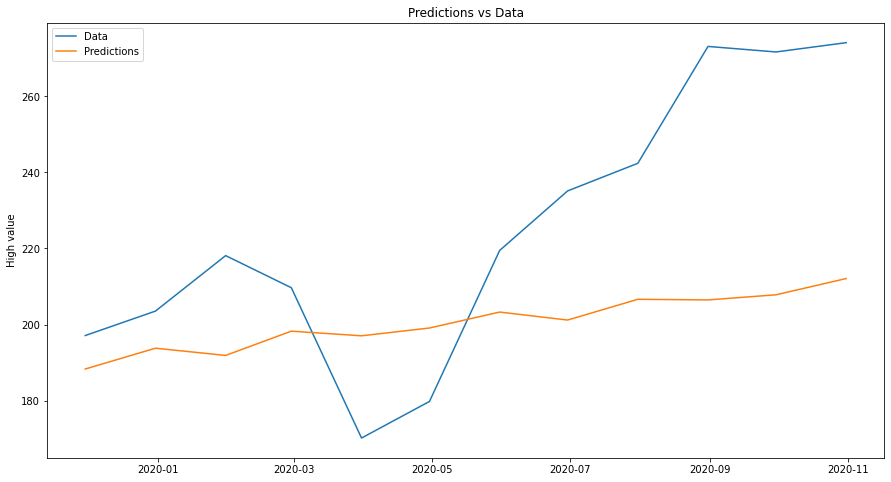

In [40]:
acf_plot= plot_acf( Facebook.High, lags = 25)
pacf_plot= plot_pacf( Facebook.High , lags = 25)

train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= Facebook[:train_end]
testd= Facebook[train_end+ timedelta(days=30):test_end]

model = ARIMA( traind, order=(2,2,8) )

#q=8 from autocorrelation
#p=2 from partial autocorrelation
#d
#order(p,d,q)
model_fit= model.fit()
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')
print('MAE is: ',np.mean(abs(residuals/testd)))

Google:


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was

MAE is:  High    0.071405
dtype: float64


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


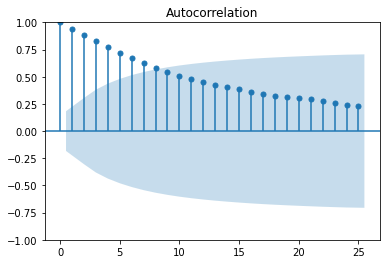

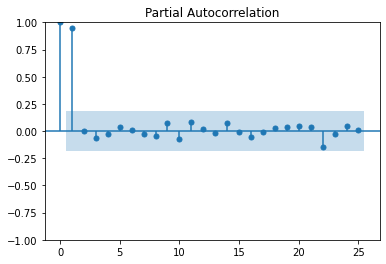

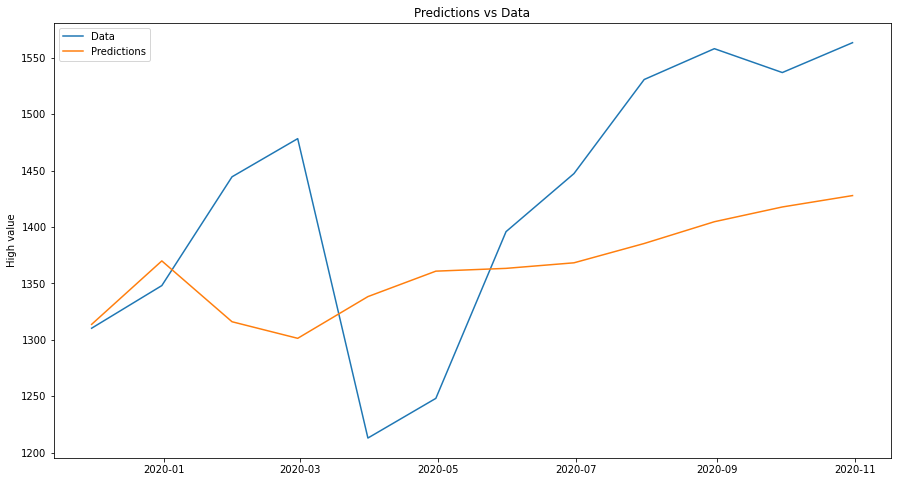

In [41]:
acf_plot= plot_acf( Google.High, lags = 25)
pacf_plot= plot_pacf( Google.High , lags = 25)

train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= Google[:train_end]
testd= Google[train_end+ timedelta(days=30):test_end]

model = ARIMA( traind, order=(2,3,8) )

#q=8 from autocorrelation
#p=2 from partial autocorrelation
#d
#order(p,d,q)
model_fit= model.fit()
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')
print('MAE is: ',np.mean(abs(residuals/testd)))

Netflix:

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was

MAE is:  High    0.235199
dtype: float64


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


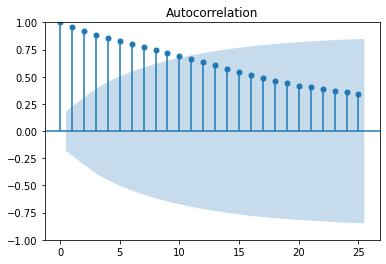

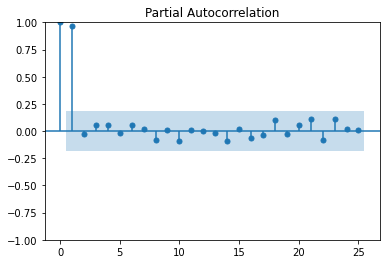

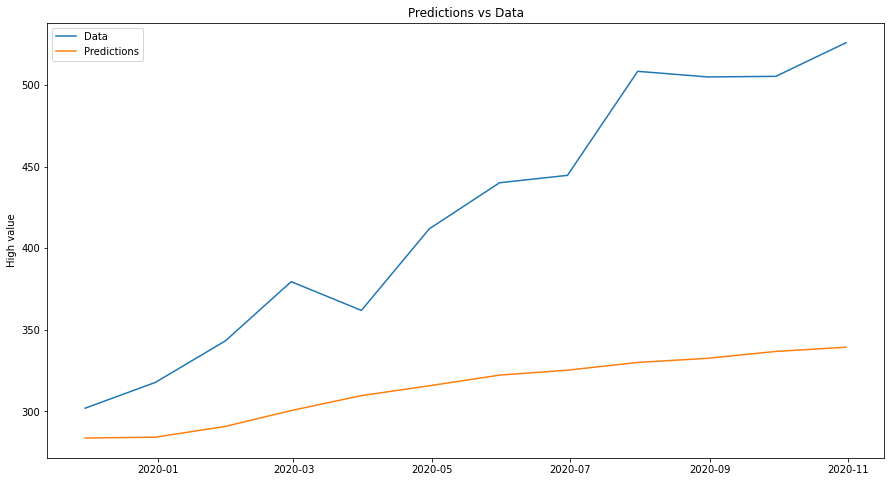

In [42]:
acf_plot= plot_acf( Netflix.High, lags = 25)
pacf_plot= plot_pacf( Netflix.High , lags = 25)

train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= Netflix[:train_end]
testd= Netflix[train_end+ timedelta(days=30):test_end]

model = ARIMA( traind, order=(2,2,8) )

#q=8 from autocorrelation
#p=2 from partial autocorrelation
#d
#order(p,d,q)
model_fit= model.fit()
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')
print('MAE is: ',np.mean(abs(residuals/testd)))

MSFT:

C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was

MAE is:  High    0.145353
dtype: float64


C:\Users\Alonso\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


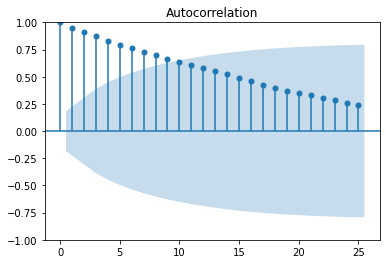

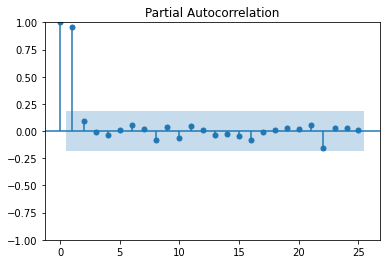

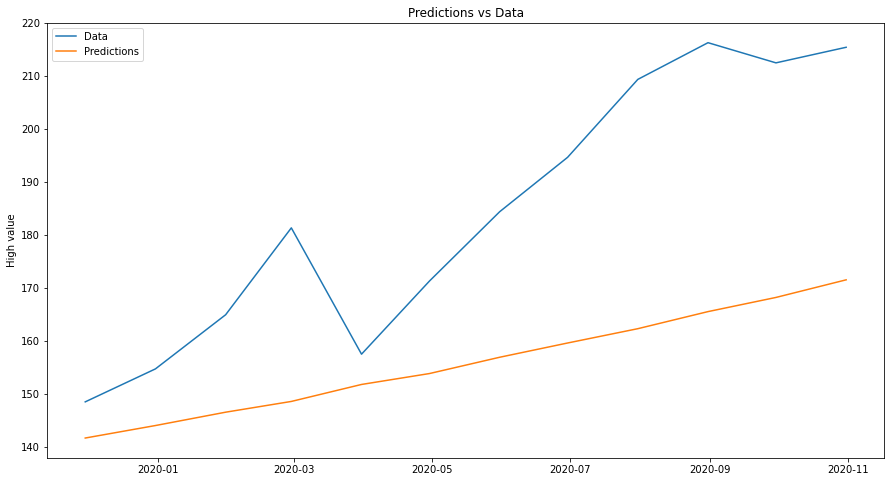

In [43]:
acf_plot= plot_acf( MSFT.High, lags = 25)
pacf_plot= plot_pacf( MSFT.High , lags = 25)

train_end=datetime(2019, 10,31)
test_end= datetime(2020, 10 ,31)
traind= MSFT[:train_end]
testd= MSFT[train_end+ timedelta(days=30):test_end]

model = ARIMA( traind, order=(2,5,8) )

#q=8 from autocorrelation
#p=2 from partial autocorrelation
#d
#order(p,d,q)
model_fit= model.fit()
pred_start_date= testd.index[0]
pred_end_date= testd.index[-1]
predictions= model_fit.predict( start = pred_start_date, end = pred_end_date )
predictions=pd.DataFrame(predictions)   
predictions.columns= ["High"]
residuals = testd - predictions
plt.figure( figsize= (15,8))
plt.plot(testd)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'))
plt.title('Predictions vs Data')
plt.ylabel('High value')
print('MAE is: ',np.mean(abs(residuals/testd)))